#Ahmad Hamdan Droobi

## The sparks Foundation internship

### Task4 : Exploratory Data Analysis - Terrorism

### importing libraries

In [2]:
# importing libraries:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset :

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### Data Exploration:

In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### I will drop columns that I won't use 

In [5]:
du=df[['iyear' , 'imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude',
         'attacktype1_txt','nkill','nwound','target1','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [6]:
# rename the columns names:
du.rename(columns={'iyear':'year','imonth':'month','iday':"day",'gname':'group','country_txt':'country','region_txt':'region','provstate':'state','attacktype1_txt':'attacktype','targtype1_txt':'targettype','weaptype1_txt':'weapon','nkill':'kill',
     'nwound':'wound'},inplace=True)

In [7]:
du.head()

,year,month,day,country,state,region,city,latitude,longitude,attacktype,kill,wound,target1,summary,group,targettype,weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
du.shape

(181691, 18)

In [9]:
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        181691 non-null  int64  
 1   month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   country     181691 non-null  object 
 4   state       181270 non-null  object 
 5   region      181691 non-null  object 
 6   city        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  group       181691 non-null  object 
 15  targettype  181691 non-null  object 
 16  weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [10]:
# missing values:
du.isnull().sum()

year               0
month              0
day                0
country            0
state            421
region             0
city             434
latitude        4556
longitude       4557
attacktype         0
kill           10313
wound          16311
target1          636
summary        66129
group              0
targettype         0
weapon             0
motive        131130
dtype: int64

In [11]:
du['wound'] = du['wound'].fillna(0)
du['kill'] = du['kill'].fillna(0)

In [12]:
du['casualties'] = du['kill'] + du['wound']

In [13]:
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        181691 non-null  int64  
 1   month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   country     181691 non-null  object 
 4   state       181270 non-null  object 
 5   region      181691 non-null  object 
 6   city        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   attacktype  181691 non-null  object 
 10  kill        181691 non-null  float64
 11  wound       181691 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  group       181691 non-null  object 
 15  targettype  181691 non-null  object 
 16  weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
 18  casualties  181691 non-null  float64
dtypes:

In [14]:
du.describe().round(2)

,year,month,day,latitude,longitude,kill,wound,casualties
count,181691.00,181691.00,181691.00,177135.00,177134.00,181691.00,181691.00,181691.00
mean,2002.64,6.47,15.51,23.50,-458.70,2.27,2.88,5.15
std,13.26,3.39,8.81,18.57,204778.99,11.23,34.31,40.56
min,1970.00,0.00,0.00,-53.15,-86185896.00,0.00,0.00,0.00
25%,1991.00,4.00,8.00,11.51,4.55,0.00,0.00,0.00
50%,2009.00,6.00,15.00,31.47,43.25,0.00,0.00,1.00
75%,2014.00,9.00,23.00,34.69,68.71,2.00,2.00,4.00
max,2017.00,12.00,31.00,74.63,179.37,1570.00,8191.00,9574.00


In [15]:
# years in this Dataset:
du['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

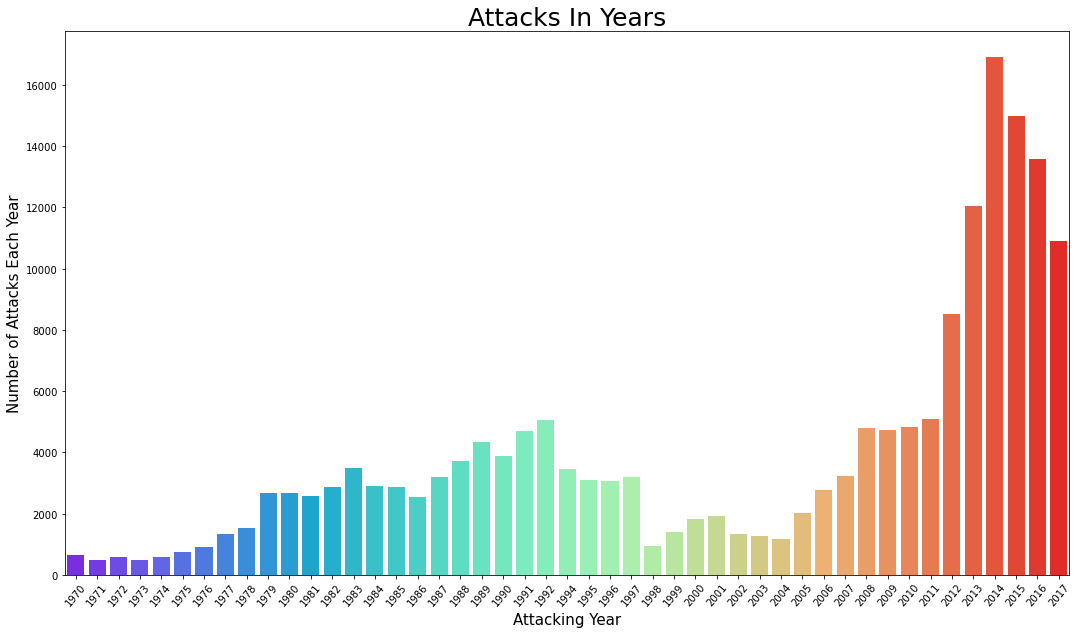

In [16]:
du['year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = du['year'].unique(),y = du['year'].value_counts(dropna = False).sort_index(),palette = "rainbow")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=15)
plt.ylabel('Number of Attacks Each Year',fontsize=15)
plt.title('Attacks In Years',fontsize=25)
plt.show()

### Note :
- **The most Attacking year was 2014**
- **the least Attacking year was 1973**

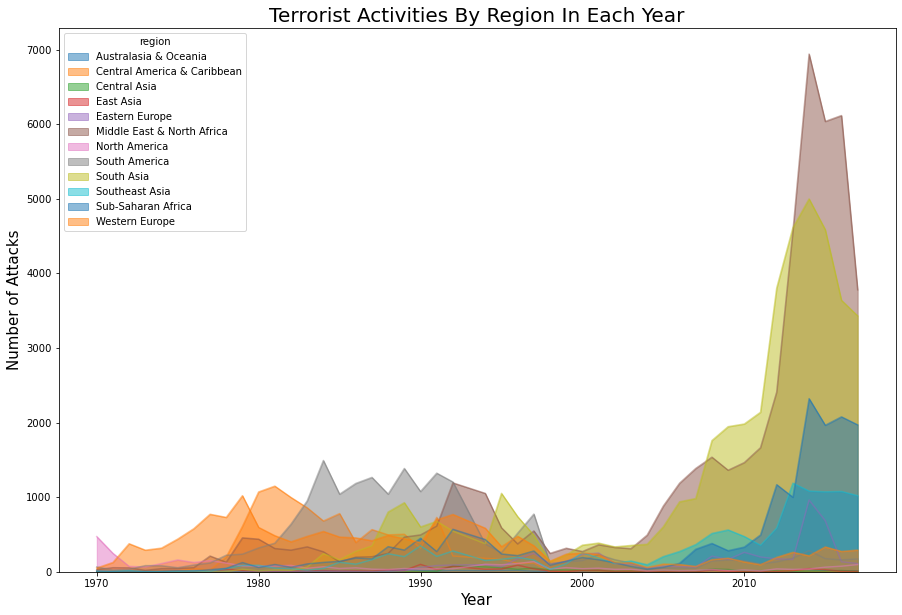

In [17]:
# Terrorist Activities By Region In Each Year
pd.crosstab(du.year, du.region).plot(kind='area',stacked=False,figsize=(15,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.show()

### Note:
- **The most region in Terrorist Activities is Middle East & North Africa**


### The largest 10 countries in Terrorist Activities :

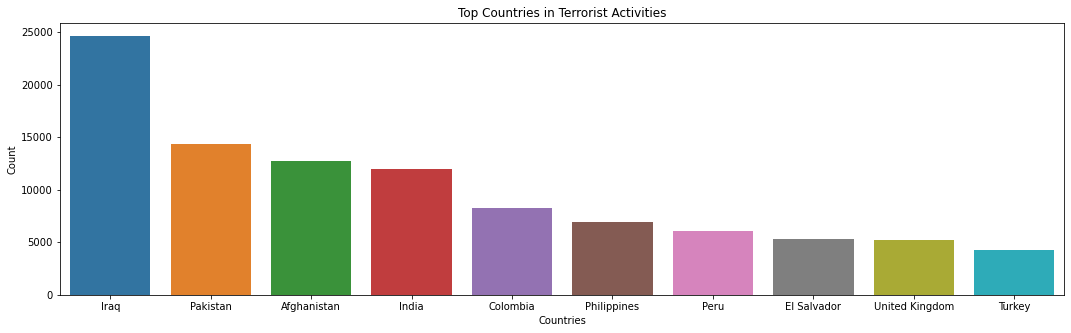

In [18]:
plt.subplots(figsize=(18,5))
du.country.value_counts().nlargest(10)
sns.barplot(du['country'].value_counts()[:10].index,du['country'].value_counts()[:10].values)
plt.title('Top Countries in Terrorist Activities')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

### Note:
- **Iraq is the largest country in Terrorist Activities**
- **Turkey is the least country in Terrorist Activities**

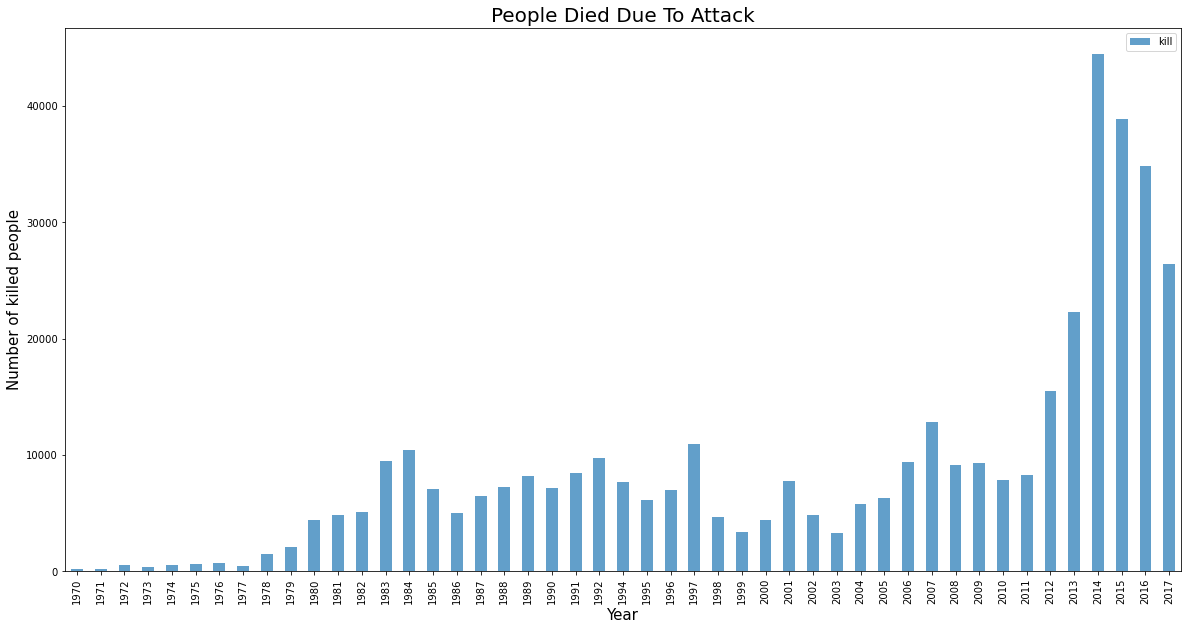

In [19]:
# people Died Due To Attack:
df1=du[['year','kill']].groupby(['year']).sum()
fig,ax4 = plt.subplots(figsize=(20,10))
df1.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 90)
plt.title("People Died Due To Attack",fontsize=20)
plt.ylabel("Number of killed people",fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.show()

### Note :
- **The most year people died was 2014**
- **The least year people died was 1970**

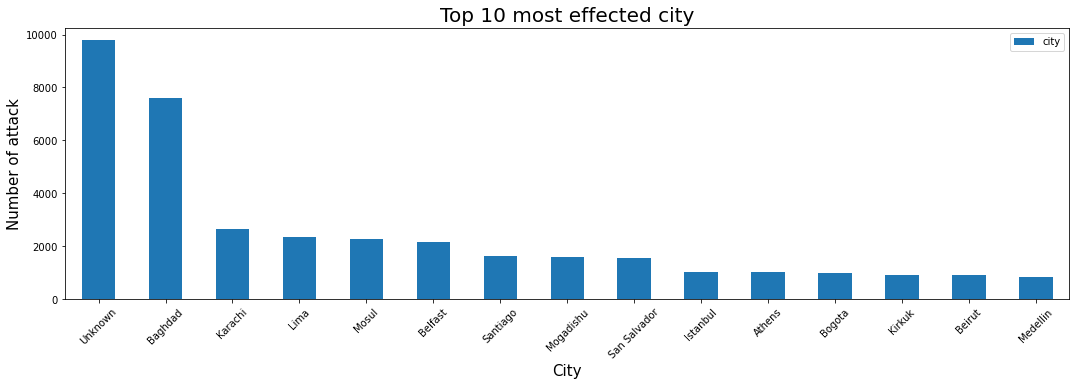

In [20]:
# Top 10 most effected City :
du['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(15).plot(kind='bar',figsize=(18,5))
plt.xticks(rotation = 45)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

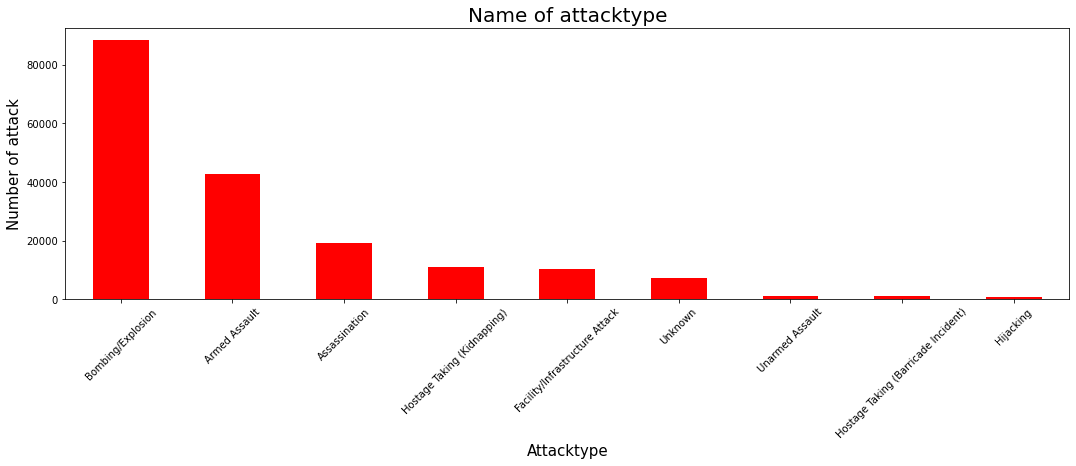

In [21]:
#The top 10 attacktype :
du['attacktype'].value_counts().nlargest(10).plot(kind='bar',figsize=(18,5),color='red')
plt.xticks(rotation = 45)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

### Note :
- **Bombing/Explosion is the most attacktype repeated in this Dataset**
- **Hijacking is the least attacktype repeated in this Dataset**

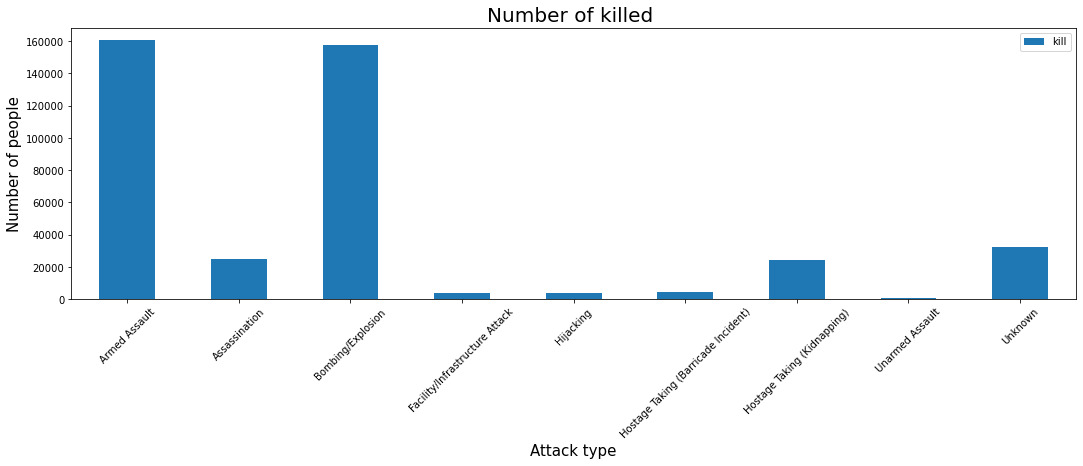

In [22]:
# number of killed people from each Attacktype:
du[['attacktype','kill']].groupby(["attacktype"],axis=0).sum().plot(kind='bar',figsize=(18,5))
plt.xticks(rotation=45)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

### Note :
- **The Most people who died were from Armed Assault**
- **The Least people who died were from Unarmed Assault**

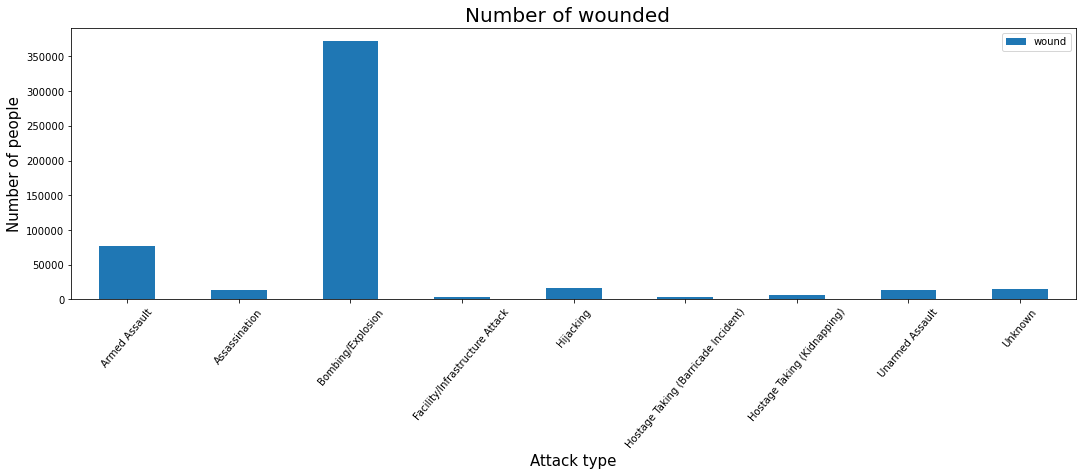

In [23]:
# number of wounded people from each Attacktype:
du[['attacktype','wound']].groupby(["attacktype"],axis=0).sum().plot(kind='bar',figsize=(18,5))
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

### Note:
- **The Most number of wounded people from Bombing/Explosion**
- **The Least number of wounded people from Hostage Taking(Barricade incident)**

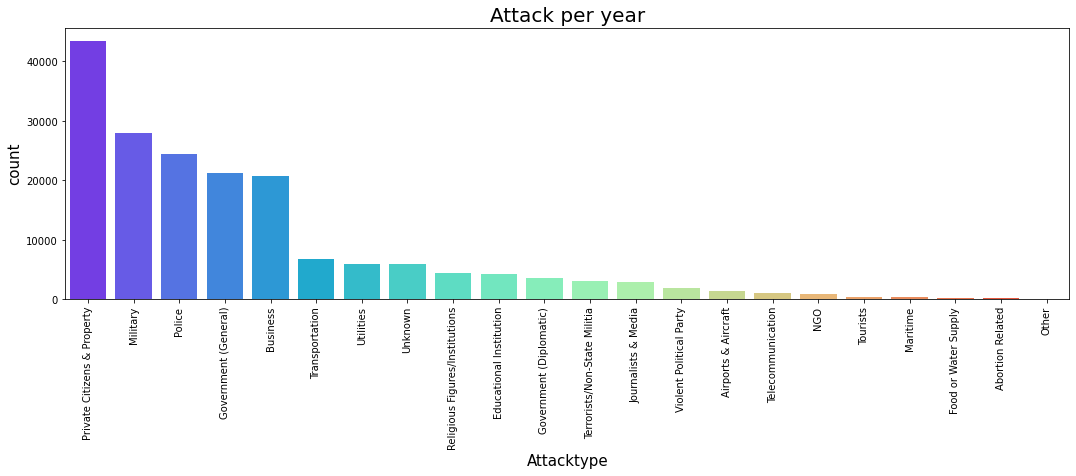

In [24]:
plt.subplots(figsize=(18,5))
sns.countplot(du["targettype"],order=du['targettype'].value_counts().index,palette="rainbow")
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

### Note :
- **Private Citizens & Property is the top attack**
- **Other is the least attack**

### Top 10 terrorist group attack :

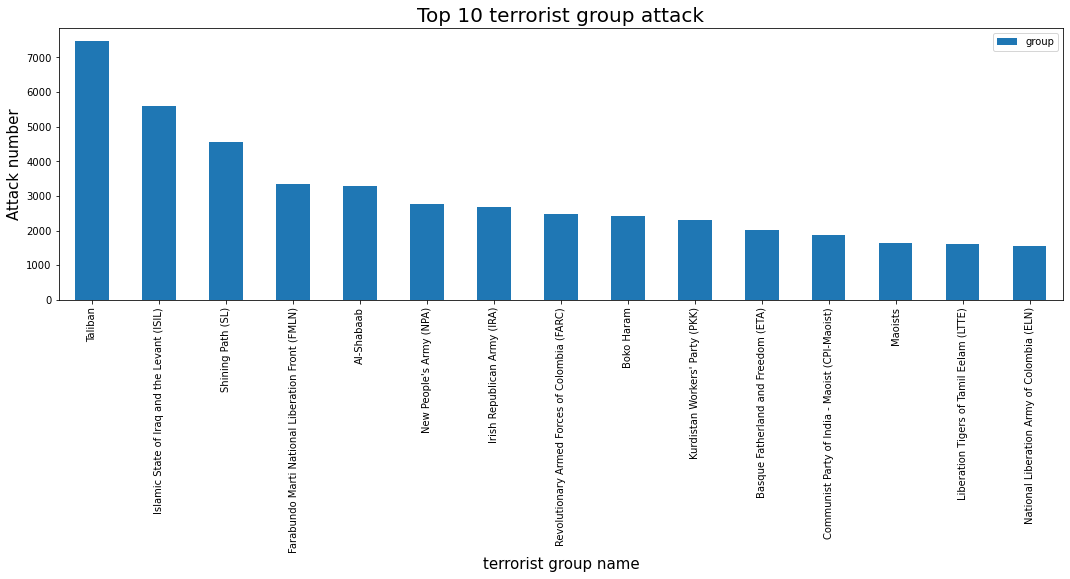

In [25]:
du['group'].value_counts().to_frame().drop('Unknown').head(15).plot(kind='bar',figsize=(18,5))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

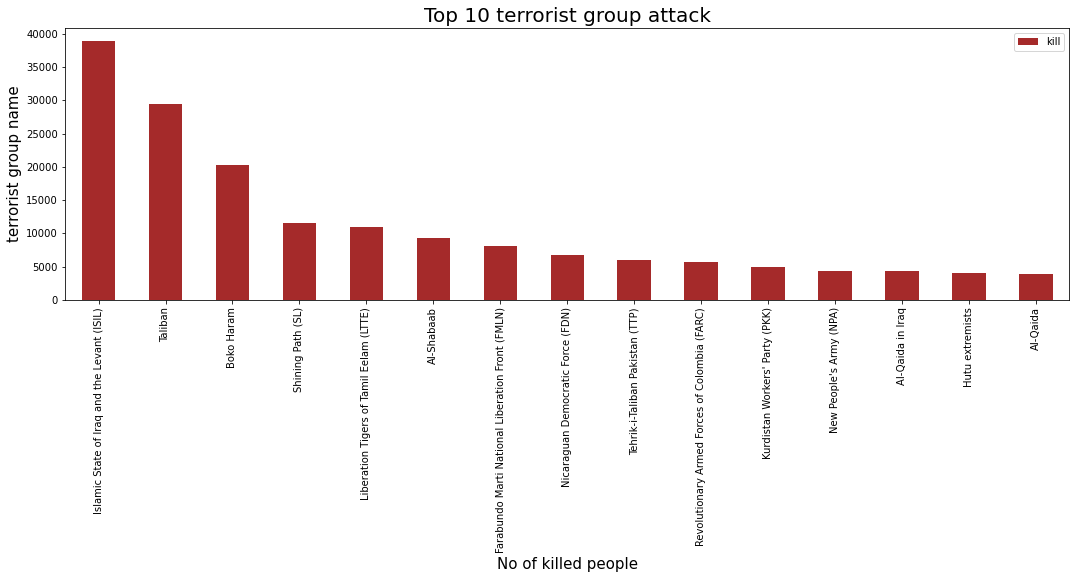

In [26]:
# Top 10 terrorist group attack :
du[['group','kill']].groupby(['group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(15).plot(kind='bar',color='brown',figsize=(18,5))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("No of killed people",fontsize=15)
plt.ylabel("terrorist group name",fontsize=15)
plt.show()


### Note :
- **Islamic State of Iraq and the Levant (ISIL)in (Iraq) Is The MOST terrorist group attack**
- **AI-Qaida in (Yemen) is the Least terrorist group attack**

In [67]:
df1=du[['group','country','kill']]
df1=df1.groupby(['group','country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(15)
df1

,group,country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [27]:
kill = du.loc[:,'kill']
print('Number of people killed by terrorist attack:', int(sum(kill.dropna())))

Number of people killed by terrorist attack: 411868


In [28]:
type_Kill = du.pivot_table(columns='attacktype', values='kill', aggfunc='sum')
type_Kill

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [29]:
country_Kill = du.pivot_table(columns='country', values='kill', aggfunc='sum')
country_Kill

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


## The conclusions :
- **Region with the most attacks is Middle East & North Africa**
- **country with the most terrorist attacks is Iraq**
- **city with the most terrorist attacks is Baghdad**
- **year with the most attacks is 2014**
- **month with the most attacks is 5**
- **Most Attack Types are Bombing/Explosion**
- **Group with the most attacks is Taliban**

## Thanks